In [1]:
import pandas as pd # Import pandas library and alias it as 'pd' for easier referencing
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as 'plt' for easier referencing

In [2]:
# Read a CSV file from the specified URL into a pandas DataFrame.
# The 'parse_dates' parameter is used to convert the 'Month' column to datetime objects.

df=pd.read_csv('https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/example-lessons/Intro-to-forecasting/portland-oregon-average-monthly-.csv',parse_dates = ['Month'])


In [3]:
# Rename the specified column in the DataFrame to 'monthly_ridership'.
# The 'columns' parameter is a dictionary where the keys are the old column names and the values are the new column names.
# The 'inplace' parameter is set to True to modify the DataFrame in place without creating a copy.

df.rename(columns = {'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114':'monthly_ridership'},inplace = True)

In [4]:
df

,Month,monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN


In [6]:
df.head(10) # Display the first 10 rows

,Month,monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [7]:
df.shape # Get the shape (number of rows and columns) of the DataFrame

(116, 2)

In [8]:
df.dropna(inplace = True) # Remove rows with missing values from the DataFrame

In [9]:
df.isnull().sum() # Count the number of missing values in each column of the DataFrame

Month                0
monthly_ridership    0
dtype: int64

In [10]:
df = df.iloc[:112]  # Keep the first 112 rows of the DataFrame

In [32]:
df

,Month,monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
107,1968-12,1329
108,1969-01,1461
109,1969-02,1425
110,1969-03,1419


In [11]:
df1 = df.iloc[:110] # Create a new DataFrame with the first 110 rows of the original DataFrame

In [12]:
df1

,Month,monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
105,1968-10,1417
106,1968-11,1417
107,1968-12,1329
108,1969-01,1461


In [13]:
df = df.set_index('Month')  # Set the 'Month' column as the index of the DataFrame

In [14]:
df

,monthly_ridership
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630
...,...
1968-12,1329
1969-01,1461
1969-02,1425


In [15]:
df = df['monthly_ridership'].apply(lambda x: int(x))  # Convert the 'monthly_ridership' column values to integers

In [16]:
rid_df = pd.DataFrame(df) # Create a new DataFrame 'rid_df' as a copy of the existing DataFrame 'df'

In [17]:
rid_df

,monthly_ridership
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630
...,...
1968-12,1329
1969-01,1461
1969-02,1425


<Axes: xlabel='Month'>

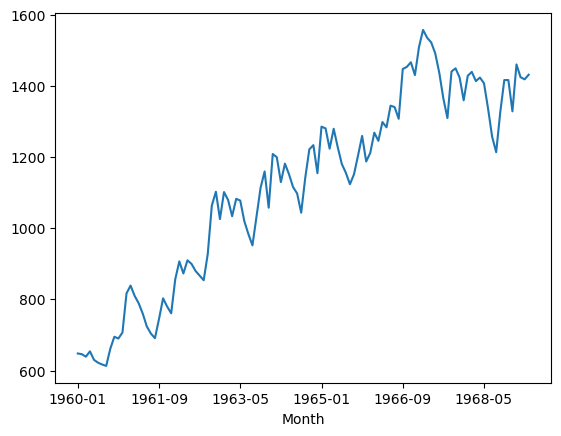

In [18]:
rid_df['monthly_ridership'].plot() # Plot the 'monthly_ridership' data

In [19]:
import statsmodels # Import the statsmodels library
print(statsmodels.__version__) # Print the version of the statsmodels library

0.14.0


<Figure size 640x480 with 0 Axes>

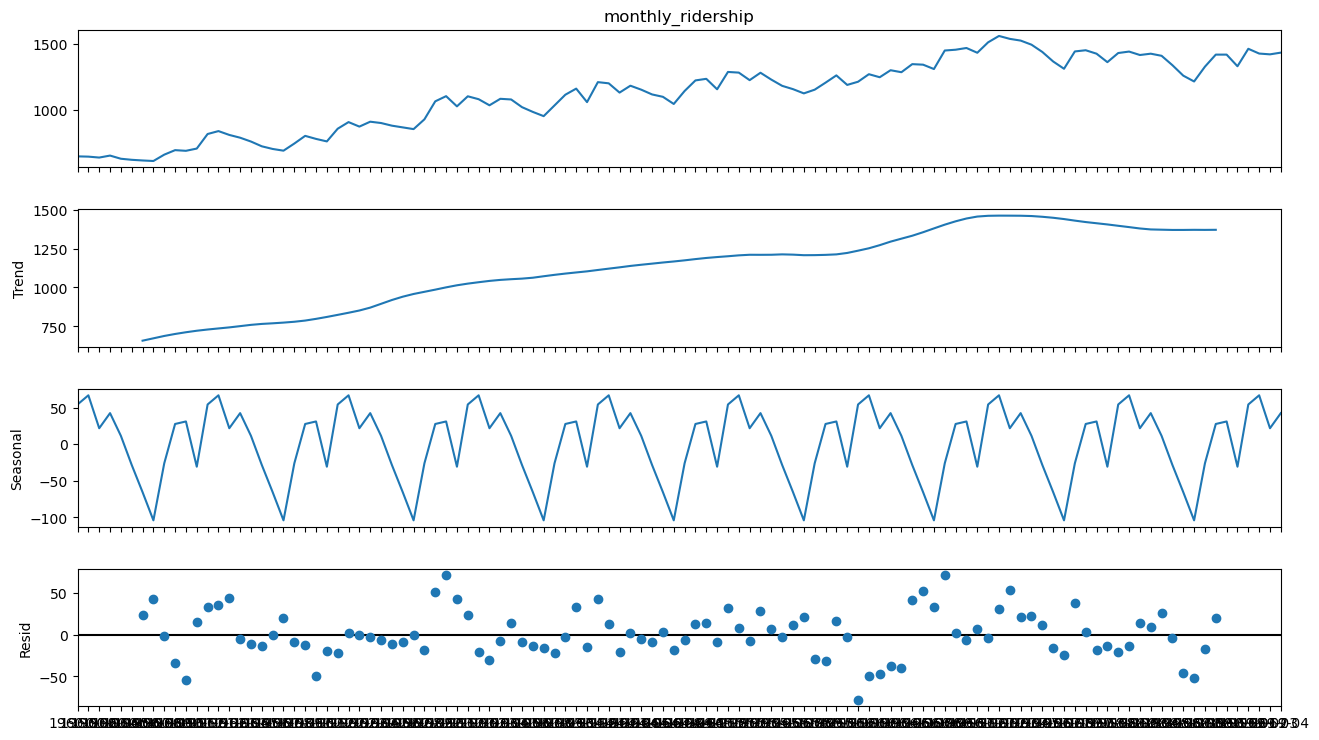

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposing Time series
decomposition = seasonal_decompose(rid_df.monthly_ridership,model='additive', period=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)